In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import urllib.request
import pandas as pd
from numpy import genfromtxt
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

### Moon

Data loading.
Load the datasets directly from Github.

In [ ]:
datasets_links = {"light": "Albedo_Map.csv",
            "fe" : "LPFe_Map.csv",
            "k" : "LPK_Map.csv",
            "th" : "LPTh_Map.csv",
            "ti" : "LPTi_Map.csv"
            }

datasets_img = {} #2-D array of pixels

for key, value in datasets_links.items():
    response = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Moon/'+value)
    lines = [l.decode('utf-8') for l in response.readlines()]
    datasets_img[key] = genfromtxt(lines, delimiter=',')

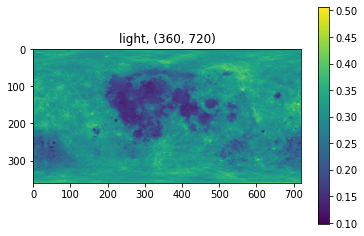

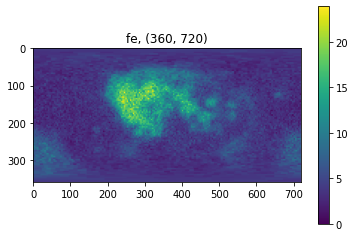

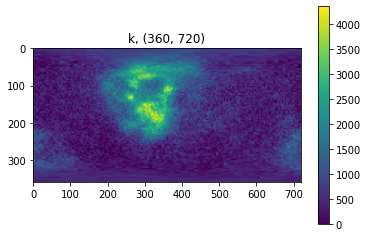

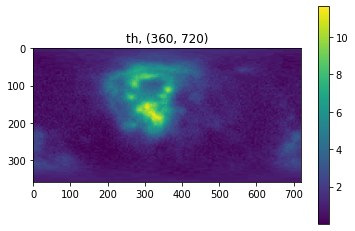

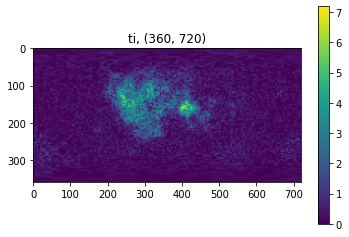

In [ ]:
for i, (name, img) in enumerate(datasets_img.items()):
    plt.figure(i)
    plt.title(f"{name}, {img.shape}")
    plt.imshow(img)#, cmap='gray')
    plt.colorbar()

**Data processing.**
Create train and test sets by splitting the image in a half.

In [ ]:
train = []
test = []

#chemicals = np.array([datasets_img[key].flatten() for key in ['light','fe', 'k', 'th', 'ti']]).T
chemicals = np.array(list(zip(datasets_img['light'].flatten(), datasets_img['fe'].flatten(), datasets_img['k'].flatten(), datasets_img['th'].flatten(), datasets_img['ti'].flatten())))
n = len(chemicals)//2
train_set = chemicals[:n]
test_set = chemicals[n:]
train_set_x, train_set_y = train_set[:,1:], train_set[:,0]
test_set_x, test_set_y  = test_set[:,1:], test_set[:,0]

Correlation matrix. The correlation between variables is very high.

In [ ]:
df = pd.DataFrame(chemicals,columns=['light','fe','k','th','ti'])
corrMatrix = df.corr()
print(corrMatrix)

          light        fe         k        th        ti
light  1.000000 -0.811343 -0.548442 -0.574907 -0.683682
fe    -0.811343  1.000000  0.691200  0.725192  0.804646
k     -0.548442  0.691200  1.000000  0.937672  0.554363
th    -0.574907  0.725192  0.937672  1.000000  0.591886
ti    -0.683682  0.804646  0.554363  0.591886  1.000000


Train and Test ML model.

In [ ]:
model = LinearRegression().fit(train_set_x, train_set_y)
#model = MLPRegressor(random_state=1, max_iter=500).fit(train_set_x, train_set_y)
#model = LinearSVR(max_iter=3000).fit(train_set_x, train_set_y)
score_train_set = model.score(train_set_x, train_set_y)
score_test_set = model.score(test_set_x, test_set_y)
print(f"Score train set: {score_train_set}")
print(f"Score test set: {score_test_set}")

Score train set: 0.7764561271197249
Score test set: 0.4315049105022408



Generate predicted image based on ML Model.

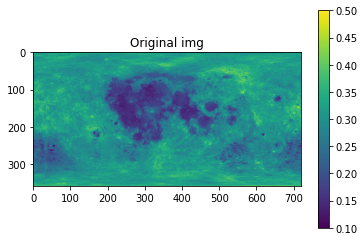

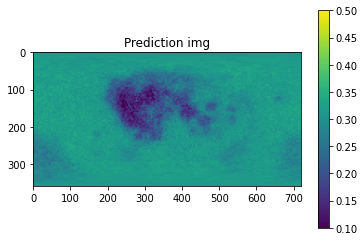

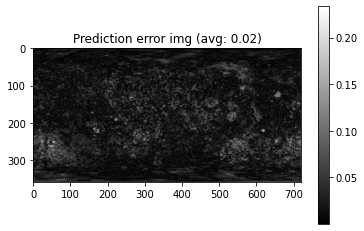

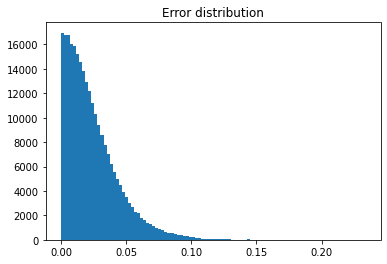

In [ ]:
right_img = datasets_img['light']
plt.figure(0)
plt.title("Original img")
plt.imshow(right_img, vmin=0.10, vmax=0.5)
plt.colorbar()

full_prediction = np.concatenate([model.predict(train_set_x), model.predict(test_set_x)])
new_img = full_prediction.reshape(360,720)
plt.figure(1)
plt.title("Prediction img")
plt.imshow(new_img, vmin=0.10, vmax=0.5)
plt.colorbar()

error_img = np.abs(new_img-right_img)
avg_error = np.average(error_img.flatten())
plt.figure(2)
plt.title(f"Prediction error img (avg: {avg_error:.2f})")
plt.imshow(error_img, cmap='gray')
plt.colorbar()

plt.figure(3)
plt.title("Error distribution")
plt.hist(error_img.flatten(), bins=100);

### Mercury

Data loading. Same process as for the moon.

In [ ]:
datasets_links = {"top_light": "mercury-albedo-top-half.png.csv",
                  "bottom_light" : "mercury-albedo-resized-bottom-half.png.csv",
            "alsi" : "alsimap_smooth_032015.png.csv",
            "casi" : "casimap_smooth_032015.png.csv",
            "fesi" : "fesimap_smooth_032015.png.csv",
            "mgsi" : "mgsimap_smooth_032015.png.csv",
            "ssi" : "ssimap_smooth_032015.png.csv"
            }

datasets_img = {}

for key, value in datasets_links.items():
    response = urllib.request.urlopen('https://raw.githubusercontent.com/ML4SCI/ML4SCI_GSoC/main/Messenger/Mercury/'+value)
    lines = [l.decode('utf-8') for l in response.readlines()]
    datasets_img[key] = genfromtxt(lines, delimiter=',')
datasets_img["all_light"] = np.concatenate((datasets_img["top_light"], datasets_img["bottom_light"]))

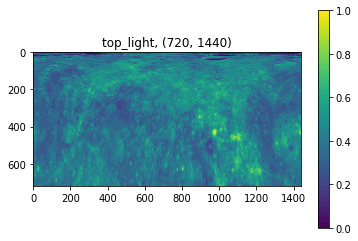

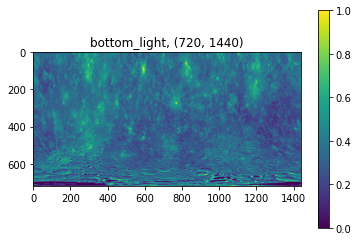

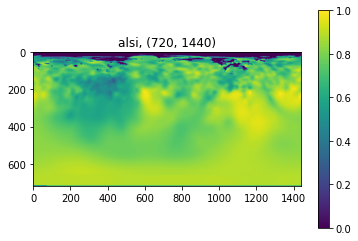

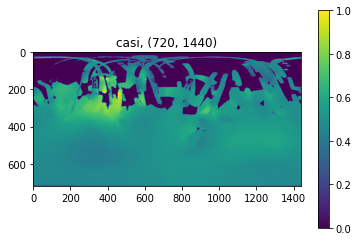

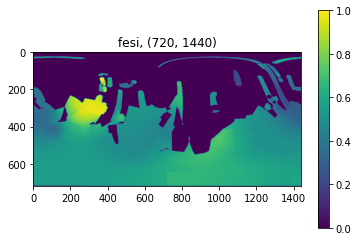

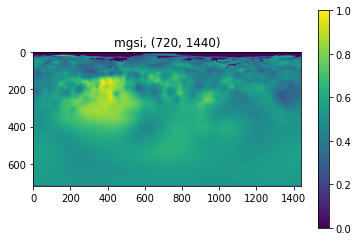

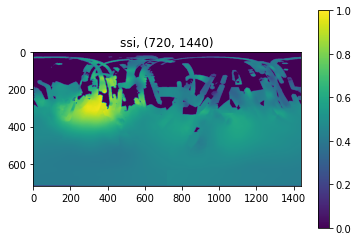

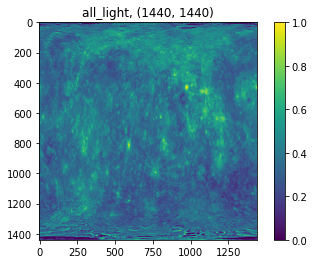

In [ ]:
for i, (name, img) in enumerate(datasets_img.items()):
    plt.figure(i)
    plt.title(f"{name}, {img.shape}")
    plt.imshow(img, vmin=0, vmax=1)#, cmap='gray')
    plt.colorbar()

**Data processing.**
Create train and test set.

In [ ]:
train = []
test = []

chemicals = np.array(list(zip(datasets_img['top_light'].flatten(), datasets_img['alsi'].flatten(), datasets_img['casi'].flatten(), datasets_img['fesi'].flatten(), datasets_img['mgsi'].flatten(), datasets_img['ssi'].flatten())))
n = len(chemicals)//2
train_set = chemicals[:n]
test_set = chemicals[n:]
train_set_x, train_set_y = train_set[:,:1], train_set[:,1:]
test_set_x, test_set_y  = test_set[:,:1],  test_set[:,1:]

Correlation matrix. The correlation is very low between albedo and chemicals. However, the correlation between some chemical is very high.

In [ ]:
df = pd.DataFrame(chemicals,columns=['top_light','alsi','casi','fesi','mgsi','ssi'])

corrMatrix = df.corr()
print(corrMatrix)

           top_light      alsi      casi      fesi      mgsi       ssi
top_light   1.000000  0.101683  0.002648 -0.045356  0.084904 -0.024850
alsi        0.101683  1.000000  0.417360  0.355446  0.399451  0.344053
casi        0.002648  0.417360  1.000000  0.549103  0.462453  0.935043
fesi       -0.045356  0.355446  0.549103  1.000000  0.307113  0.565331
mgsi        0.084904  0.399451  0.462453  0.307113  1.000000  0.515704
ssi        -0.024850  0.344053  0.935043  0.565331  0.515704  1.000000


Train and Test ML model.

In [ ]:
model = LinearRegression().fit(train_set_x, train_set_y)
#model = MLPRegressor(random_state=1, max_iter=500).fit(train_set_x, train_set_y)
#model = LinearSVR(max_iter=3000).fit(train_set_x, train_set_y)
#model = SGDRegressor().fit(train_set_x, train_set_y)

score_train_set = model.score(train_set_x, train_set_y)
score_test_set = model.score(test_set_x, test_set_y)
print(f"Score train set: {score_train_set}")
print(f"Score test set: {score_test_set}")

predicted_y = model.predict(test_set_x)
predicted_y2 = model.predict(train_set_x)
print(f"RMSE Train: {np.average((train_set_y - predicted_y2)**2)**0.5}")
print(f"RMSE Test: {np.average((test_set_y - predicted_y)**2)**0.5}")
print(f"Average value test: {np.average(test_set_y)}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

Score train set: 0.007553347171958635
Score test set: -4.926562014702188
RMSE Train: 0.254107681032788
RMSE Test: 0.24178411873071592
Average value test: 0.5748313156321622


Generate predicted images based on ML Model.

<Figure size 432x288 with 0 Axes>

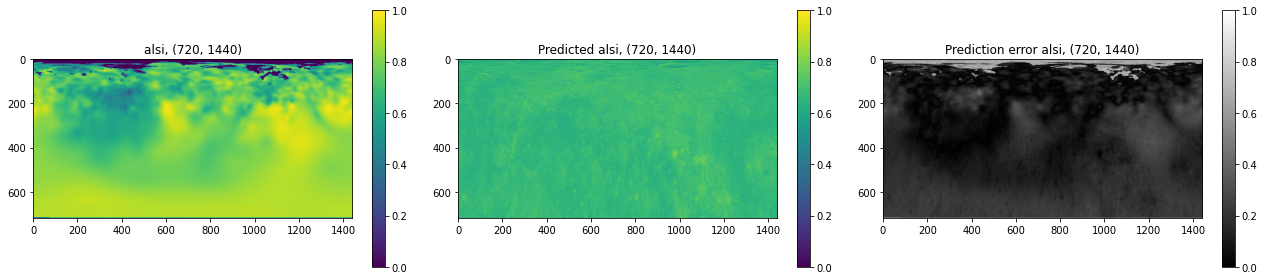

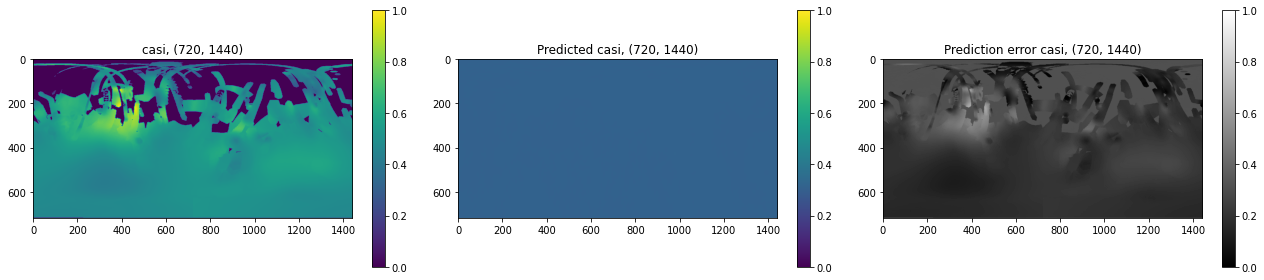

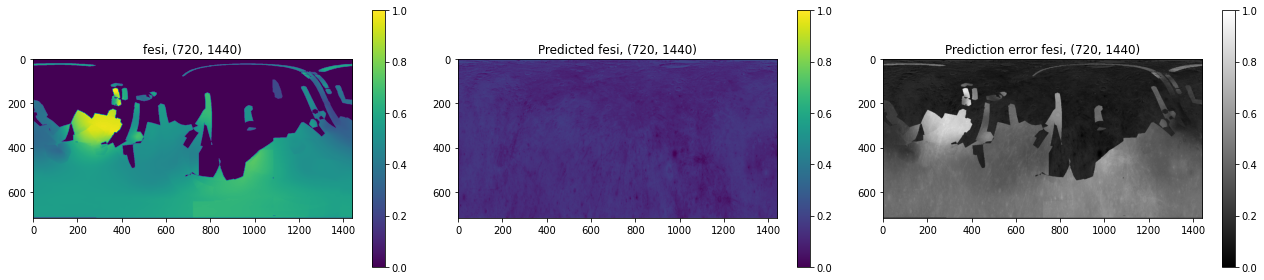

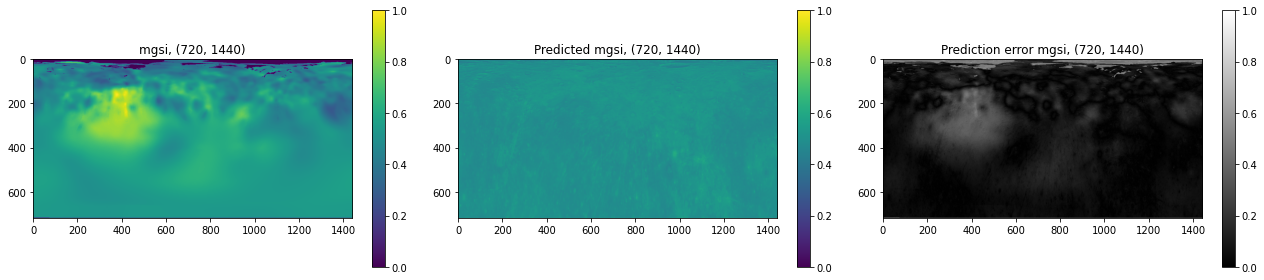

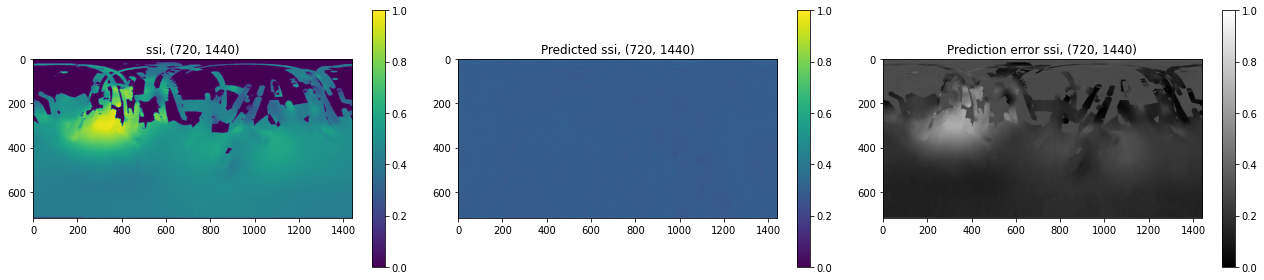

In [ ]:
full_prediction = model.predict(datasets_img['top_light'].reshape(-1,1))
chemical_keys = ["alsi","casi", "fesi","mgsi", "ssi"]

for i, name in enumerate(chemical_keys):
    img = datasets_img[name]
    predicted_img = full_prediction[:,i].reshape(720,-1)
    prediction_error = np.abs(predicted_img - img)

    plt.figure(i)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

    axes[0].set_title(f"{name}, {img.shape}")
    im = axes[0].imshow(img, vmin=0, vmax=1)#, cmap='gray')
    plt.colorbar(im, ax=axes[0])
    axes[1].set_title(f"Predicted {name}, {img.shape}")
    im = axes[1].imshow(predicted_img, vmin=0, vmax=1)#, cmap='gray')
    plt.colorbar(im, ax=axes[1])

    axes[2].set_title(f"Prediction error {name}, {img.shape}")
    im = axes[2].imshow(prediction_error, cmap='gray', vmin=0, vmax=1)
    plt.colorbar(im, ax=axes[2])

    fig.tight_layout()

### Bottom prediction.

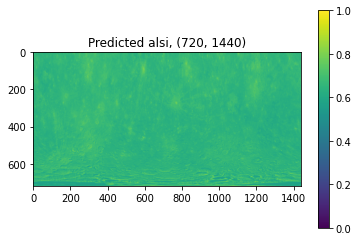

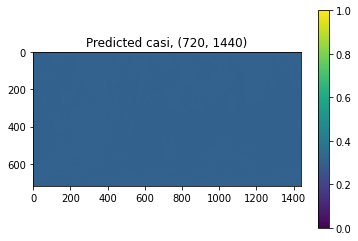

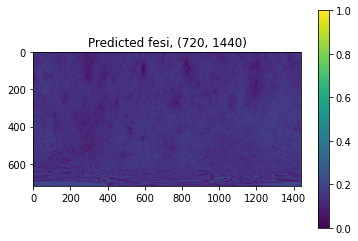

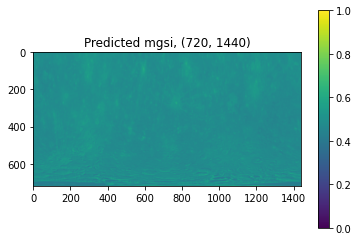

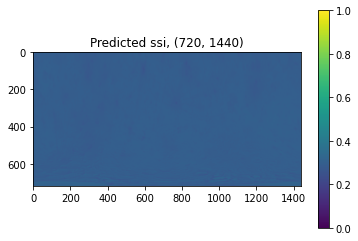

In [ ]:
full_prediction = model.predict(datasets_img['bottom_light'].reshape(-1,1))
chemical_keys = ["alsi","casi", "fesi","mgsi", "ssi"]

for i, name in enumerate(chemical_keys):
    predicted_img = full_prediction[:,i].reshape(720,-1)
    plt.figure(i)
    plt.title(f"Predicted {name}, {img.shape}")
    plt.imshow(predicted_img, vmin=0, vmax=1)#, cmap='gray')
    plt.colorbar()
    fig.tight_layout()